<a href="https://colab.research.google.com/github/DSWoodin/Practice/blob/main/PKNU_5th/02_ML/02_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 강의 분량
* 07월12일(금) 2시간

### 강의 자료
* (수정)파이썬머신러닝03평가.ipynb

### 이 장에서 배우는 것
* Accuracy(정확도) accuracy_score()
* MNIST 데이터셋 예제 load_digits()
* 불균형 데이터에서 정확도의 한계
* Confustion Matrix(혼동행렬) confusion_matrix()
* Precision(정밀도) precision_score
* Recall(재현율) recall_score
* 로지스틱 회귀 기반 타이타닉 생존자 예측 Confustion Matrix 확인
* predict_proba()와 predict() 차이
* Binarizer() 활용 임계값 설정
* 임계값에 따른 정밀도-재현율 값 추출 precision_recall_curve()
* 임계값에 따른 정밀도-재현율 값 시각화
* 정밀도, 재현율의 한계와 F1 Score f1_score
* ROC Curve 개념과 시각화 roc_curve()
* AUC 수치의 의미 roc_auc_score()
* 피마 인디언 당뇨병 예측

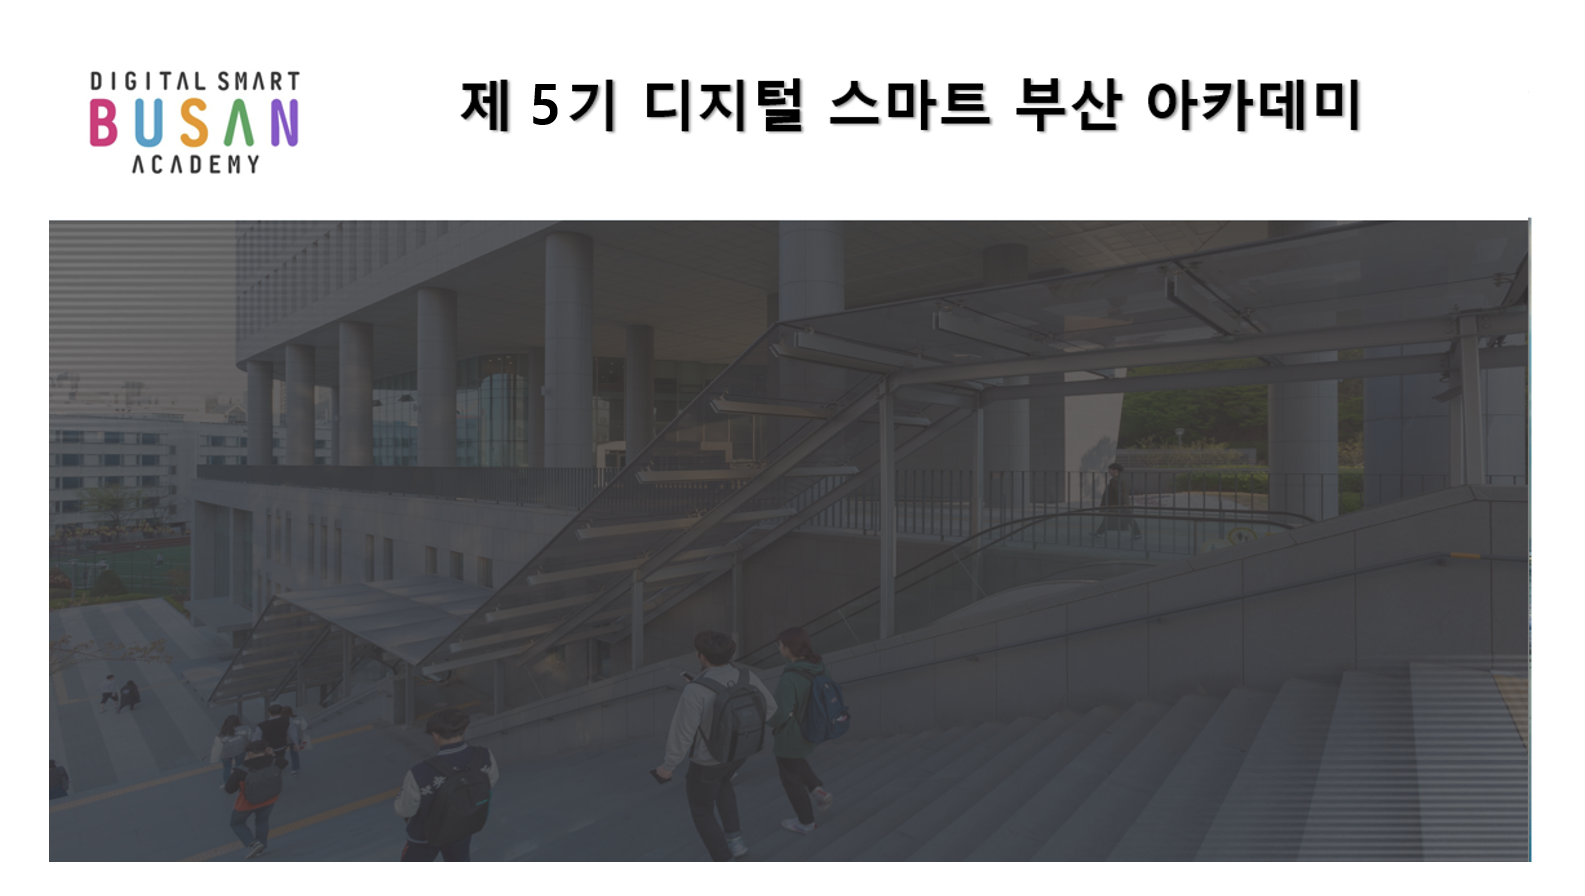

#   3장. 평가
* 성능 평가 지표(Evaluation Metric)는 일반적으로 모델이 분류냐 회귀냐에 따라 여러 종류로 나뉨
  * 회귀: 대부분 실제 값과 예측 값의 오차 평균값에 기반함  
  5장에서 회귀를 위한 평가를 자세히 다룰 예정
  * 분류: 대부분 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반  
  단순히 정확도만 가지고 판단하면 잘못된 평가 결과에 빠질 수 있음  
  ... 여러 지표를 보고 비교해야 함  
  이진 분류의 성능 평가 지표를 집중적으로 설명

         

* 분류의 성능 평가 지표
  * 정확도(Accuracy)
  * 오차행렬(Confusion Matrix)
  * 정밀도(Precision)
  * 재현율(Recall)
  * F1 스코어
  * ROC AUC

# 01 Accuracy(정확도)
* 정확도  
: 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표  

$$Accuracy(정확도)={{예측 결과가 동일한 데이터 건수}\over{전체 예측 데이터 건수}}$$

  * 주의할 점) 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있음  
      *  Ex) 타이타닉
*  Ex) 정확도 지표가 어떻게 ML 모델의 성능을 왜곡하는지 예제

In [1]:
# 원하는 버전을 설치하고자 할 때의 명령문
!pip install scikit-learn==1.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 29.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.13.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [2]:
import sklearn

print(sklearn.__version__)

1.0.2


In [1]:
# 아무런 학습을 하지 않고, 성별에 따라 생존자를 예측하는 단순한 Classifier

import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) 메소드는 아무것도 학습하지 않음.
    def fit(self, X , y=None):
        pass

    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함.
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1

        return pred


In [2]:
# 생성된 MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행

from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
from google.colab import drive
drive.mount('/content/drive')
file_path = ('/content/drive/MyDrive/data_머신러닝/titanic_train.csv')

titanic_df = pd.read_csv(file_path)
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,
                                                  test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Mounted at /content/drive
Dummy Classifier의 정확도는: 0.7877


* 위의 결과에서의 문제점은?

* 정확도는 불균형한(imbalanced) 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아님
  * Ex) 100개 데이터, 90개는 0 레이블, 10개는 1 레이블  
  : 무조건 0으로 예측 결과 반환할 경우, 정확도 90%

* Ex) 불균형 자료 예제 - MNIST 데이터 세트
  * MINST 데이터 세트: 0~9까지 숫자 이미지
  * 레이블 값이 7인 것만 True, 나머지 값은 모두 False로 변환
  * 전체 데이터의 10%만 True, 나머지 90%는 False인 불균형한 데이터 세트
  * 예측 정확도: 약 90%
  * 정확도의 한계: 무조건 특정한 결과로 찍어도 데이터 분포가 균일하지 않을 경우 높은 수치의 정확도 값을 얻을 수 있음


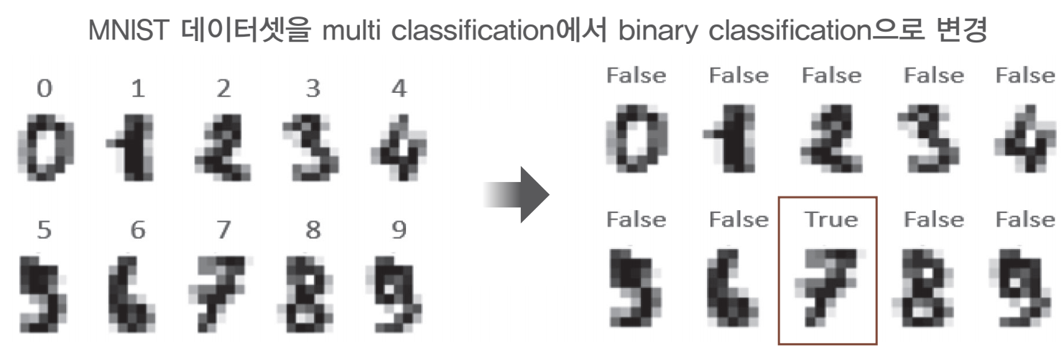

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass

    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [6]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [7]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [8]:
# 불균형한 레이블 데이터 분포도 확인.
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


* 정확도 만으로는 한계가 있음

# 02 오차행렬(Confusion Matrix, 혼동행렬)
* 이진 분류에서 성능 지표로 잘 활용됨
  
* 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표
* 아래 그림과 같이, 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지 나타냄
* TN, FP, FN, TP는 예측 클래스와 실제 클래스의 Positive 결정 값(값1)과 Negative 결정 값(값0)의 결합에 따라 결정됨
* 앞 문자 True/False는 예측값과 실제값이 '같은가/틀린가'를 의미
* 뒤 문자 Negative/Positive는 예측 결과 값이 부정(0)/긍정(1)을 의미
  * TN: 예측값을 Negative 값 0으로 예측했고, 실제 값 역시 Negative 값 0
  * FP: 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0
  * FN: 예측값을 Negative 값 0으로 예측했는데 실제 값은 Positive 값 1
  * TP: 예측값을 Positivie값 1로 예측했는데 실제 값 역시 Positive 값 1

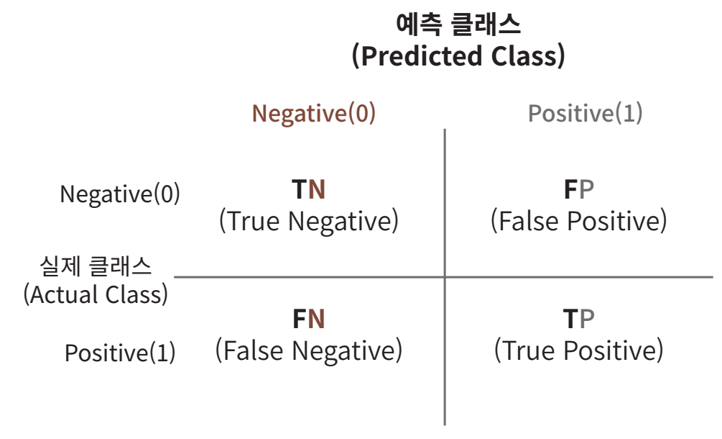

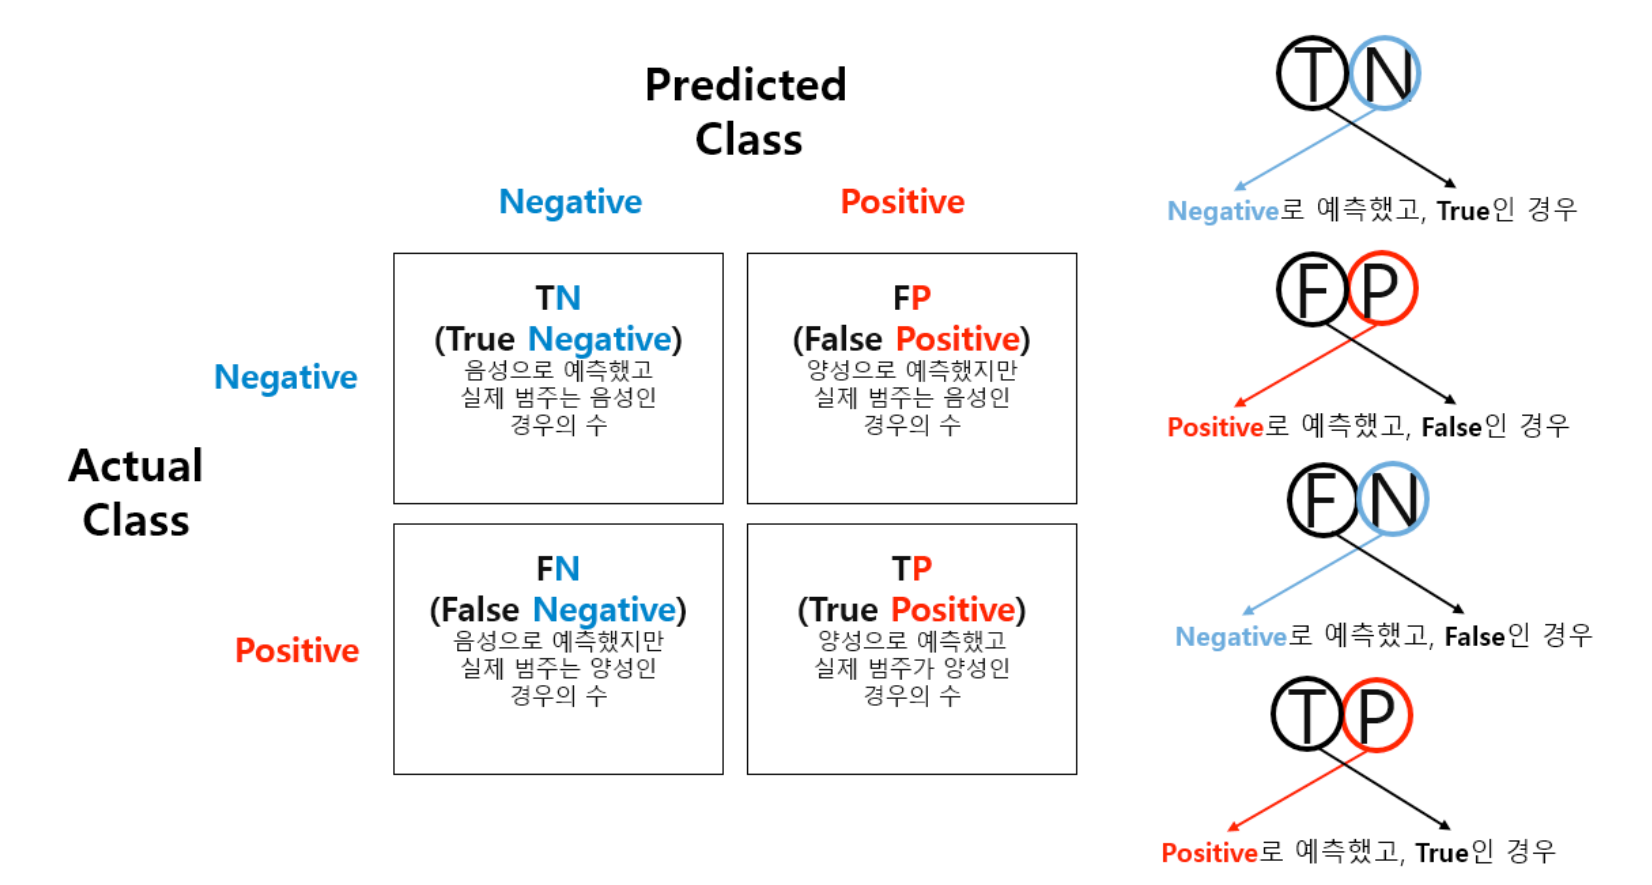

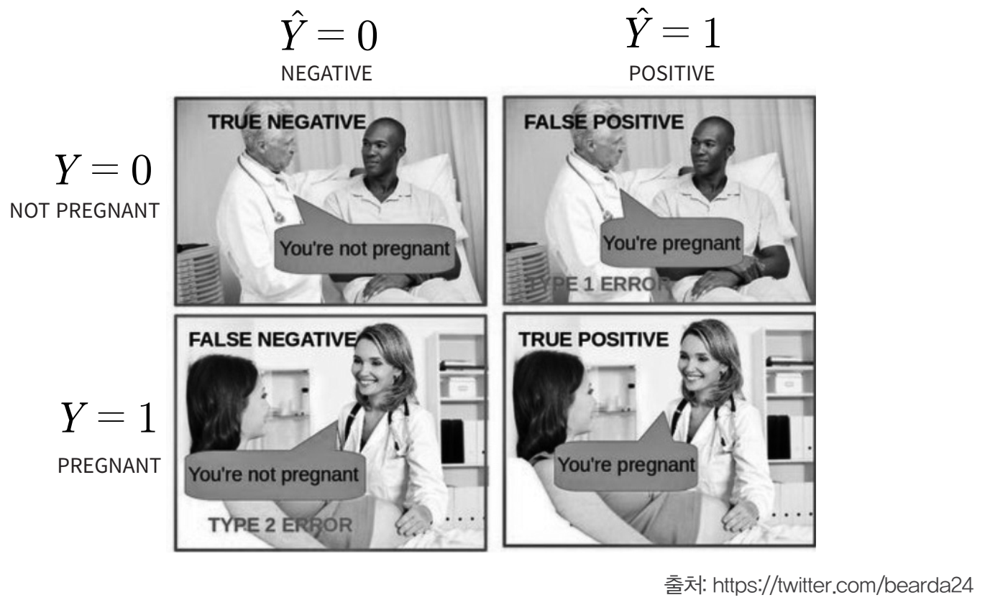

* 사이킷런에서 오차행렬을 구할 수 있는 confusion_matrix() API를 제공함

In [9]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix출력
confusion_matrix(y_test , fakepred)

array([[405,   0],
       [ 45,   0]])

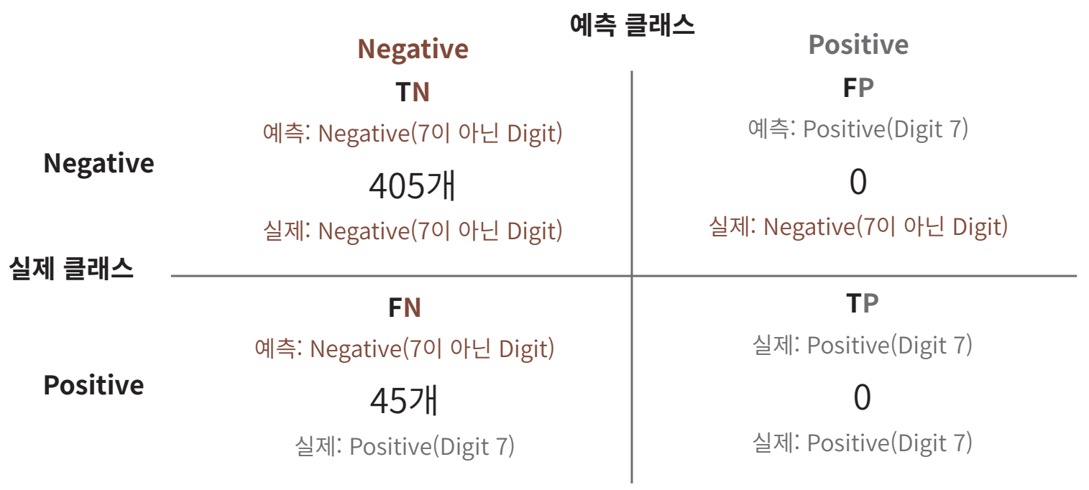

* 오차행렬을 이용하여 정확도(Accuracy), 정밀도(Precision), 재현율(Recall) 값을 알 수 있음
* 정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 = (TN+TP)/(TN+FP+FN+TP)
* 이진 분류 모델에서 매우 적은 수의 결괏값에 Positive를 설정해 1을 부여, 그렇지 않은 경우는 Negative로 0값을 부여
  * Ex) 사기 행위: 사기 행위가 Positive 양성으로 1,정상 행위가 Negative 음성으로 0 값 할당
  * Ex) 암: 양성일 경우 Positive 양성으로 1, 음성일 경우 Negative 음성으로 0 값 할당
* 불균형한 데이터에서는 정확도만으로 모델 성능을 판단하면 오류를 일으키게 되므로 주의해야 함

# 03 정밀도(Precision) 과 재현율(Recall)
* Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표

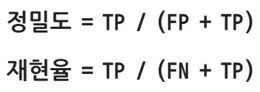

* 정밀도  
: 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
  * Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측도라고도 불림

* 재현율  
: 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
  * 민감도(Sensitive) 또는 TPR(True Positive Rate)라고도 불림

* 정밀도와 재현율 지표 중에 이진 분류 모델의 업무 특성에 따라서 특정 평규 지표가 더 중요한 지표로 간주될 수 있음
  * 재현율이 중요 지표인 경우: 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
  * Ex) 암 판단 모델, 금융 사기 적발 모델  
  
  * 정밀도가 중요한 지표인 경우: 실제 Negative 음성 데이터를 Positive로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
  * Ex) 스팸메일 여부 판단 모델

  * 대부분 재현율이 정밀도보다 상대적으로 중요한 업무가 많음

  * 사이킷런에서 정밀도 계산을 위해 precision_score(), 재현율 계산을 위해 recall_score()를 API로 제공


* MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정

In [10]:
from sklearn.metrics import accuracy_score, precision_score , recall_score

print("정밀도:", precision_score(y_test, fakepred))
print("재현율:", recall_score(y_test, fakepred))

정밀도: 0.0
재현율: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 get_clf_eval()함수 생성

In [11]:
# get_clf_eval함수 생성

from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [13]:
# 로지스틱 회귀 기반으로 타이타닉 생존자를 예측하고 confusion matrix, accuracy, precision, recall 평가 수행

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할.
from google.colab import drive
drive.mount('/content/drive')
file_path = ('/content/drive/MyDrive/data_머신러닝/titanic_train.csv')

titanic_df = pd.read_csv(file_path)
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

# LogisticRegression 객체의 solver는 로지스틱 회귀의 최적화 알고리즘 유형 지정
# 보통 작은 데이터 세트의 이진 분류인 경우 solver는 'liblinear'가 약간 성능이 좋은 경향이 있음
# solver의 기본값은 Ibfgs이며, 데이터 세트가 상대적으로 크고 다중 분류인 경우 적합
lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


### 정밀도/재현율 트레이드오프(Trade-off)
* 정밀도와 재현율은 상호 보완적인 평가 지표임
* 따라서 어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬움
* 이를 정밀도/재현율의 트레이드 오프(Trade-off)라고 부름



* 사이킷런의 분류 알고리즘에서 예측 데이터가 특정 레이블(Label)에 속하는지를 계산하기 위해   
먼저 개별 레이블별로 결정 확률을 구함.  
그리고 예측 확률이 큰 레이블값으로 예측.
* 사이킷런에서 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()제공
* predict() 메서드와 유사하지만, 예측 결과 클래스값이 아닌 예측 확률 결과를 출력함

  
* predict_proba() 함수


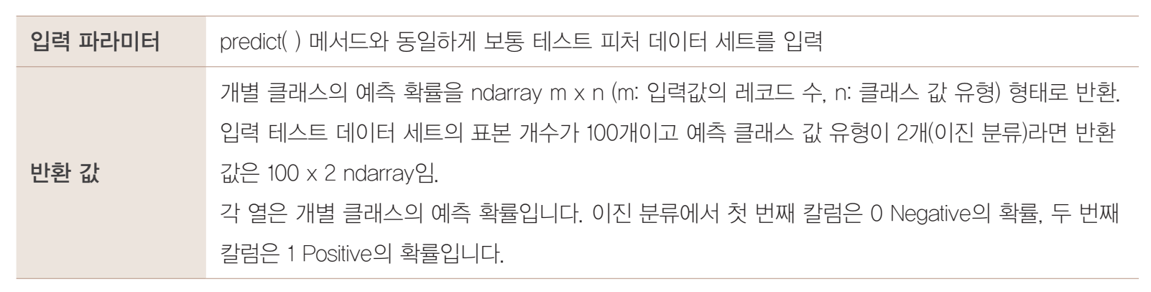

* predict_proba( ) 메소드 확인

In [14]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


* 반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로 첫 번째 칼럼 값과 두 번째 칼럼 값을 더하면 1이 된다.
* 두 개의 칼럼 중에서 더 큰 확률 값으로 predict() 메서드가 최종 예측

* redict() 메서드는 predict_proba() 메서드에 기반해 생성된 API로, predict_proba() 호출 결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어 있는 칼럼의 위치를 받아 최종적으로 예측 클래스를 결정하는 API
  * 이는 사이킷런이 어떻게 정밀도/재현율 트레이드오프를 구현했는지를 이해할 수 있으며, 사이킷런은 분류 결정 임계값을 조절해 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정할 수 있다.

* Binarizer 클래스의 사용법
  * threshold 변수를 특정 값으로 설정하고, Binarizer 클래스를 객체로 생성
  * threshold보다 같거나 작으면 0값으로, 크면 1값으로 변환해 반환

In [15]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


* 입력된 X 데이터 세트에서 Binarizer 의 threshold 값이 1.1보다 같거나 작으면 0, 크면 1로 변환

* LogisticRegression 객체의 predict_proba() 메서드로 구한 각 클래스별 예측 확률값인 pred_proba 객체 변수에 분류 결정 임곗값(threshold)을 0.5로 지정한 Binarizer 클래스를 적용해 최종 예측값을 구하는 방식
  * 분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환
  

In [16]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

# 최종 예측값에 대해 평가 지표 출력
get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


* 해당 코드로 계산된 평가 지표는 타이타닉 데이터로 학습된 로지스틱 회귀 Classifier 객체에서 호출된 predict() 로 계산된 지표 값과 정확히 같다.
  * predict() 가 predict_proba() 에 기반함을 알 수 있다.

* 분류 결정 임계값 0.4 기반에서 Binarizer를 이용하여 예측값 변환

In [17]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


* 위의 결과에서, 임곗값을 낮추니 재현율값이 올라가고 정밀도가 떨어졌음
* 이유는?  
:분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이 됨  
임곗값 값을 낮출수록 True 값이 많아지게 됨
* Positive 예측값이 많아지면 상대적으로 재현율 값이 높아짐  
: 양성 예측을 많이 하다보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문임

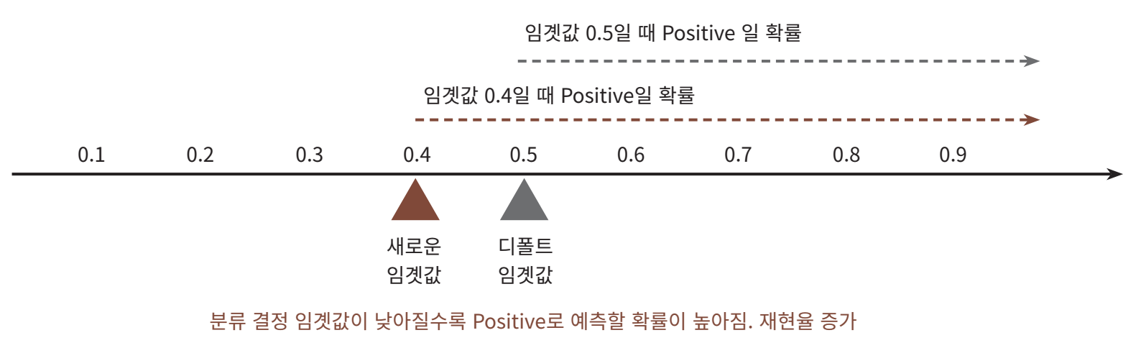

* 임곗값이 0.5에서 0.4로 낮아지면서...  
  * FN 값 변화
  * 재현율 0.77 -> 0.82
  * FP 값 변화
  * 정밀도 0.825 -> 0.704
  * 정확도 0.866 -> 0.821

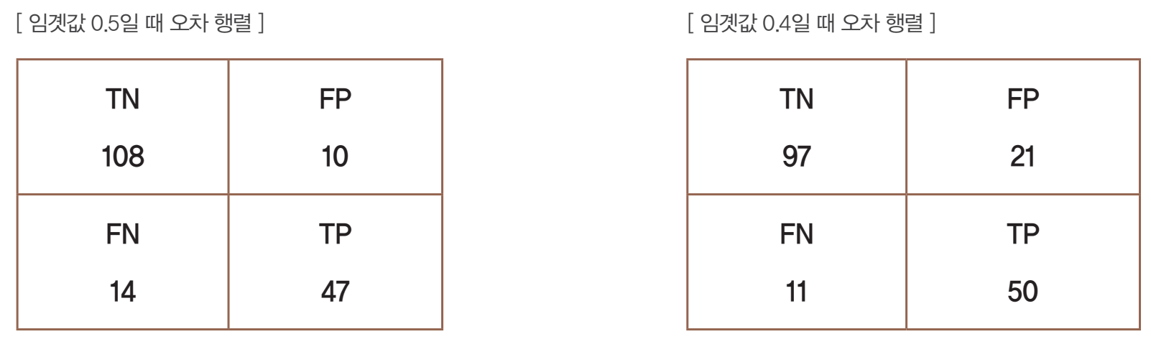

* 임계값이 0.5에서 0.4로 낮아지면서 TP 가 47에서 50으로 늘었고 FN 이 14에서 11로 줄었다.
* 그에 따라 재현율이 0.770에서 0.820으로 좋아졌다.
* 하지만 FP 는 10에서 21로 늘면서 정밀도가 0.825에서 0.704로 많이 나빠졌다.
* 그리고 정확도도 0.866에서 0.821로 나빠졌습니다.

* 여러개의 분류 결정 임곗값을 변경하면서  Binarizer를 이용하여 예측값 조사

In [18]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


* 실험 결과, 임곗값이 0.45일 경우
* 재현율을 향상시키면서 다른 수치를 어느 정도 감소하는 희생을 해야 한다면, 0.45가 가장 적당해 보임

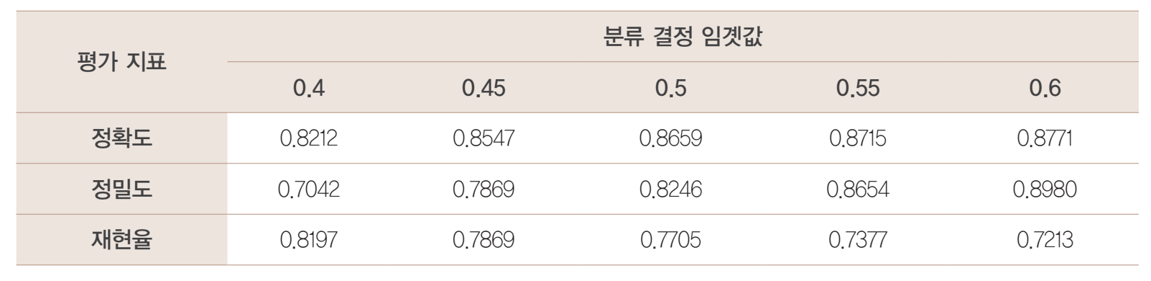

* 사이킷런은 precision_recall_curve() API를 제공함

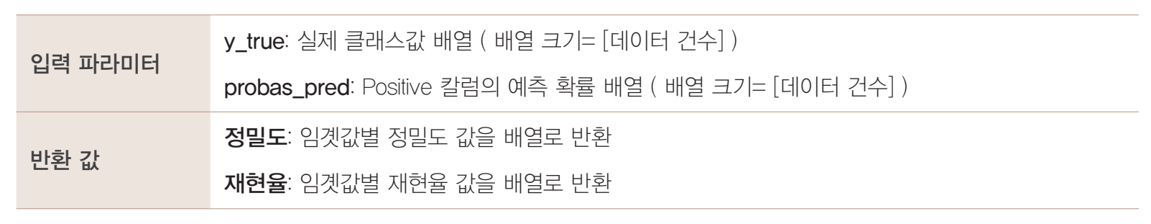

* precision_recall_curve( ) 를 이용하여 임곗값에 따른 정밀도-재현율 값 추출

* 일반적으로 0.11 ~ 0.95 정도의 임계값을 담은 넘파이 ndarray 와 이 임계값에 해당하는 정밀도 및 재현율 값을 담은 넘파이 ndarray 를 반환

In [19]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
# precision_recall_curve(): 일반적으로 0.11~0.95 정도의 임곗값을 담은 넘파이 ndarray와
#이 임곗값에 해당하는 정밀도 및 재현율 값을 담은 넘파이 ndarray를 반환
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

반환된 분류 결정 임곗값 배열의 Shape: (165,)
반환된 precisions 배열의 Shape: (166,)
반환된 recalls 배열의 Shape: (166,)
thresholds 5 sample: [0.01974988 0.06956414 0.08402808 0.08474207 0.08920161]
precisions 5 sample: [0.34078212 0.34269663 0.34463277 0.34659091 0.34857143]
recalls 5 sample: [1. 1. 1. 1. 1.]


In [20]:
#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출.
#-> 좀 더 큰 값의 임곗값과 그때의 정밀도와 재현율 값 확인
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값:  [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도:  [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율:  [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


* 위의 결과를 보면, 임곗값이 증가할수록 정밀도 값은 동시에 높아지나 재현율 값은 낮아짐

* 임곗값의 변경에 따른 정밀도-재현율 변화 곡선을 그림

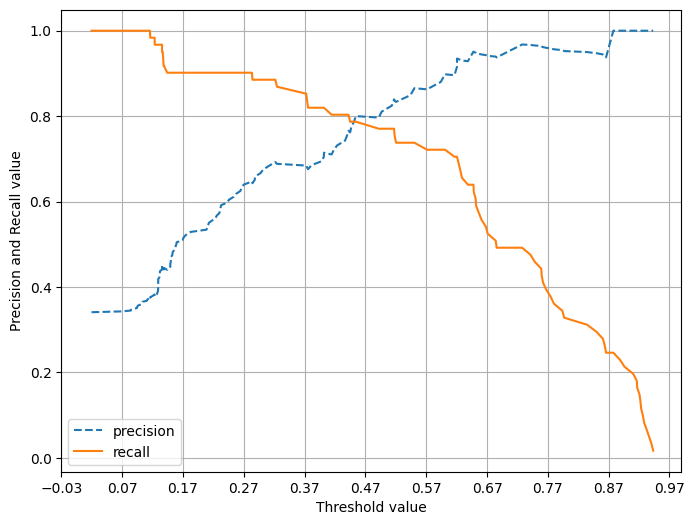

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )


* 임계값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아지며,
* 임계값이 증가할수록 재현율 값이 낮아지고 정밀도 값이 높아지는 반대의 양상이 됨

### 정밀도와 재현율의 맹점
* 앞에서 보았지만, Positive 예측의 임곗값에 따라 정밀도, 재현율 수치 변경
* 업무 환경에 맞게 임곗값 변경, 두 개 수치 상호 보완할 수 있는 수준에서 적용되어야 함


* 정밀도가 100%가 되는 방법
  * 확실한 기준이 되는 경우만 Positive로 예측하고, 나머지는 모두 Negative로 예측
  * Ex) 환자가 80세 이상, 비만, 이전에 암 진단 받음, 암세포 크기 상위 0.1% 이상  
  : 무조건 Positive, 다른 경우는 Nagative로 예측


* 재현율이 100%가 되는 방법
  * 모든 환자를 Positive로 예측

* 하지만 정밀도 또는 재현율 중 하나만 결과가 좋으면,  
성능 좋지 않은 분류로 간주할 수 있음
* 정밀도, 재현율의 수치가 적절하게 조합돼 분류의 종합적인 성능 평가에 사용될 수 있는 평가 지표가 필요함

# **04. F1 Score**
* 정밀도와 재현율을 결합한 지표
* 정밀도, 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 -> 상대적으로  높은 값을 가짐

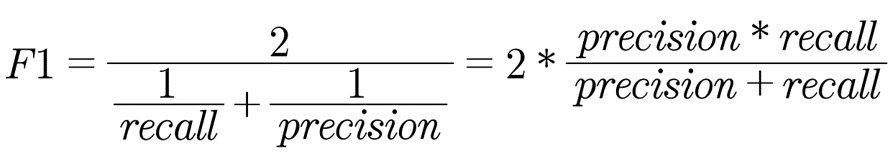

* 만일 A 예측 모델의 경우 정밀도가 0.9, 재현율이 0.1로 극단적인 차이가 나고, B 예측 모델은 정밀도가 0.5, 재현율이 0.5로 정밀도와 재현율이 큰 차이가 없다면
  * A 예측 모델의 F1 스코어 는 0.18이고, B예측 모델의 F1 스코어 는 0.5로 B 모델이 A모델에 비해 매우 우수한 F1 스코어를 가지게 된다.

* 사이킷런에서 제공하는 F1 스코어 API  
: f1_score()

In [22]:
# 로지스틱 회귀 기반 타이타닉 생존자 모델의 F1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


* 타이타닉 생존자 예측에서 임곗값 변화시키면서 F1 스코어 포함한 평가 지표 구하기

In [23]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1:0.8000


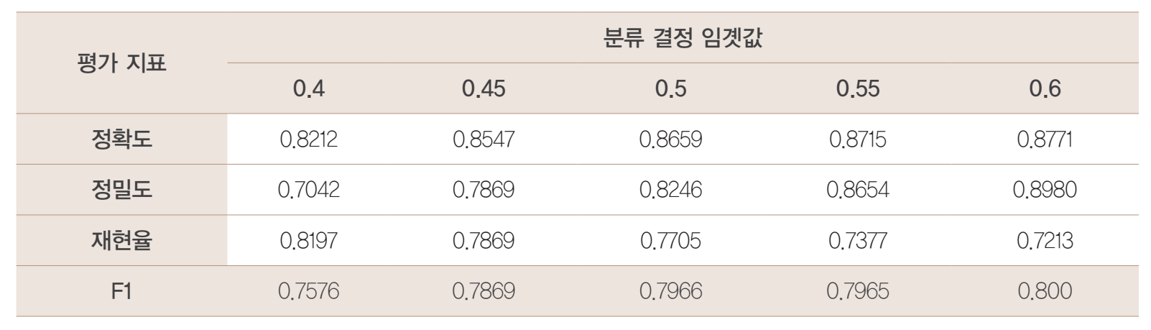

# **05 ROC Curve와 AUC**
* 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표


* ROC 곡선(Reciever Operation Characteristic Curve)
  * 우리말로 '수신자 판단 곡선'
  * 2차대전 때 통신 장비 성능 평가를 위해 고안된 수치
  * FPR(False Positive Rate, 1-특이성)이 변할 때 TPR(True Positive Rate, 민감도)이 어떻게 변하는지를 나타내는 곡선
  * FPR을 X 축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR이 변화가 곡선 형태로 나타남


* TPR(True Positive Rate) = TP / (FN + TP) <- 재현율, 민감도
* TNR(True Negative Rate) = TN / (FP + TN) <- 특이성
* FPR(False Positive Rate) = FP / (FP + TN)=1-TNR = 1-특이성

* 민감도(TPR): 실제 Positive(양성)가 정확히 예측돼야 하는 수준을 나타냄(질병이 있는 사람은 질병이 있는 것으로 양성 판정)
* 특이성(TNR): 실제값 Negative(음성)가 정확히 예측돼야 하는 수준을 나타냄(질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)


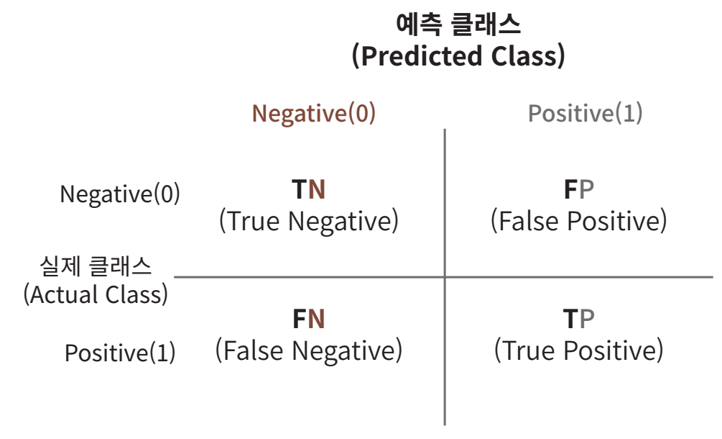

* ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것을 의미, 멀어질수록 성능이 뛰어난 것
* ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화 값을 구함

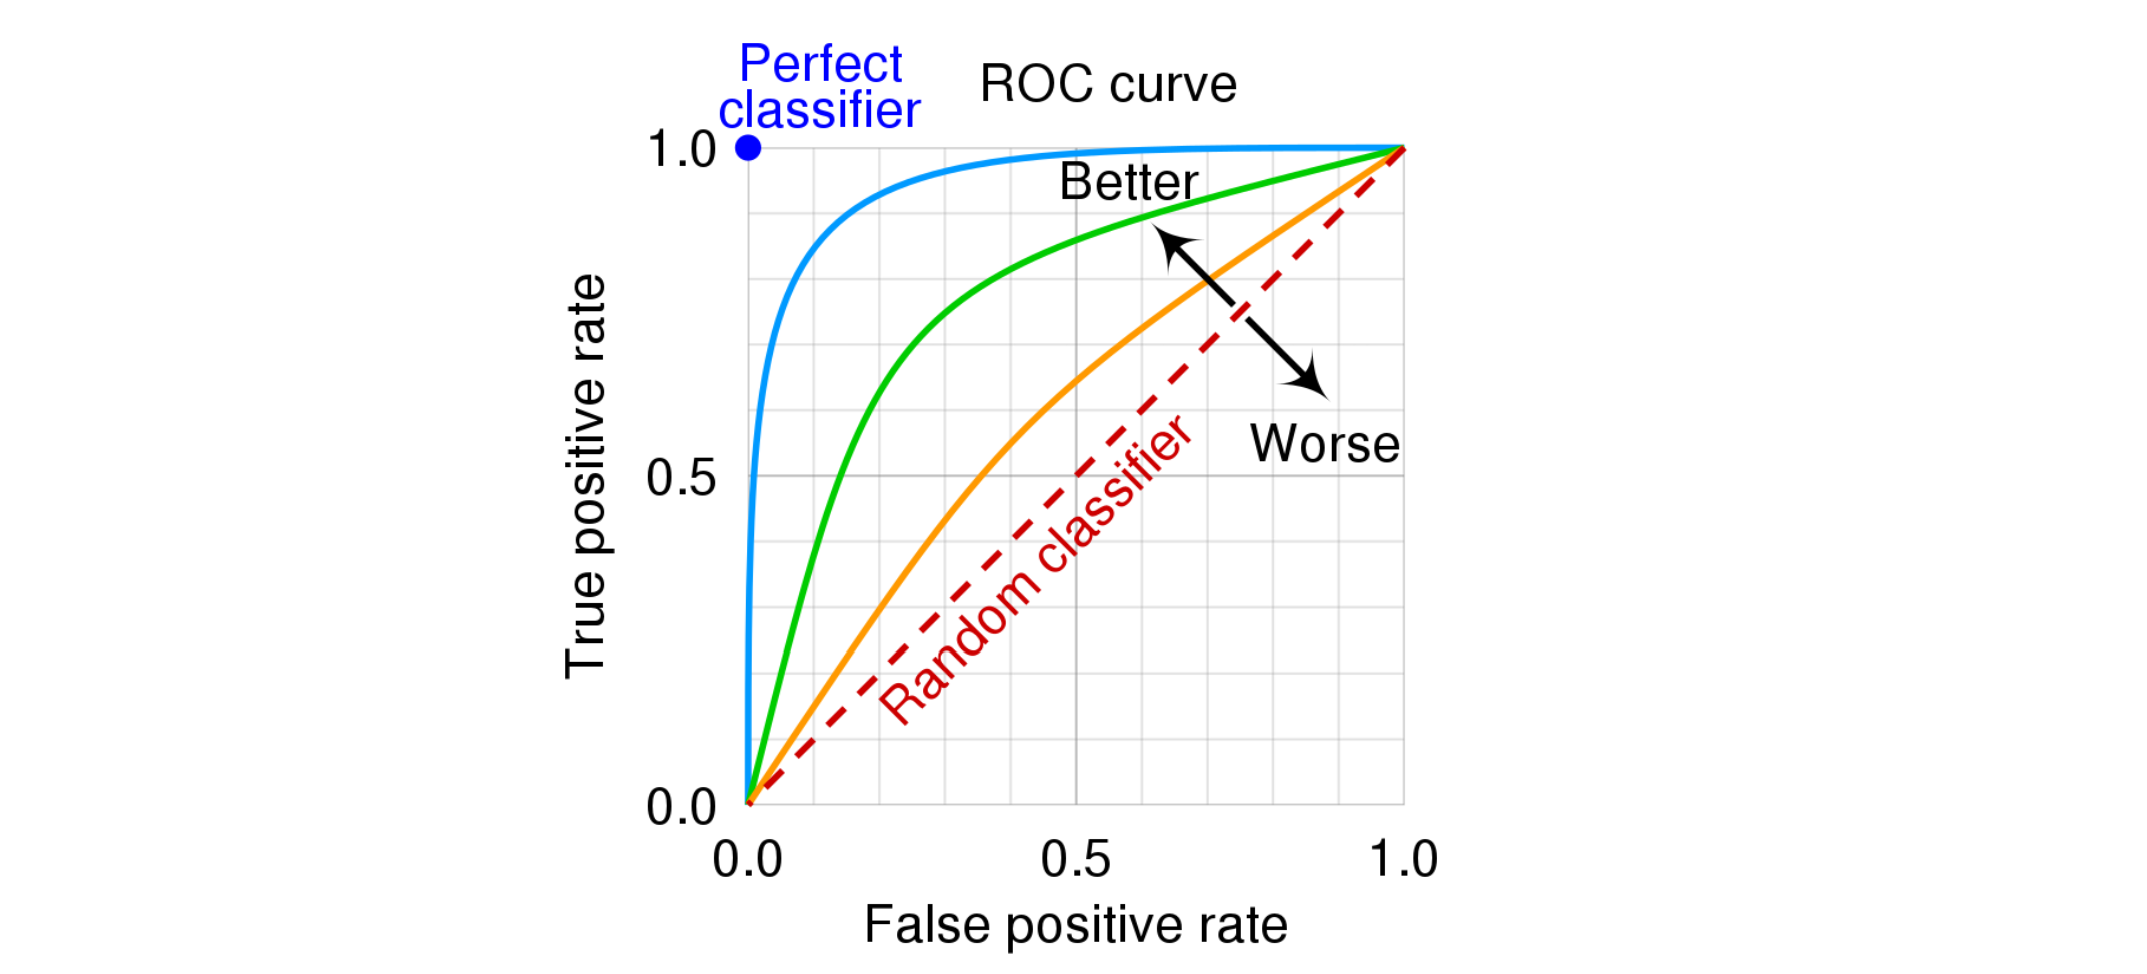

* 사이킷런에서 ROC곡선을 구하기 위한 API  
: roc_curve()

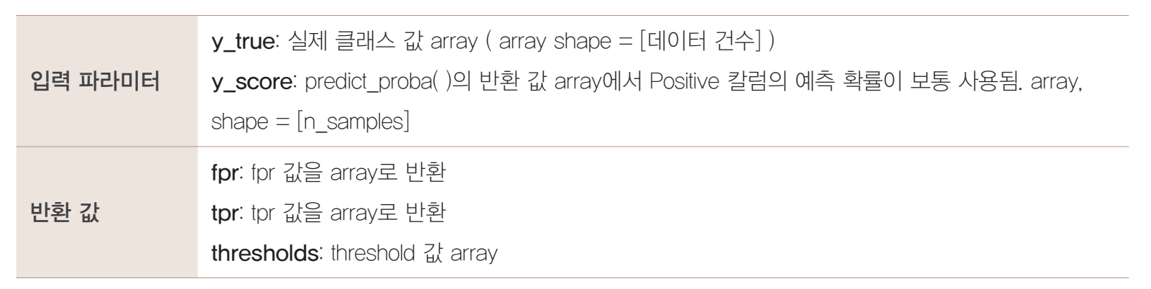

* roc_curve() API를 이용해 타이타닉 생존자 예측 모델의 FPR, TPR, 임계값 구하기

In [24]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출.
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))


샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


* roc_curve() 의 결과를 살펴보면 임계값이 1에 가까운 값에서 점점 작아지면서 FPR 이 점점 커진다.
* 그리고 FPR 이 조금씩 커질 때 TPR 은 가파르게 커짐을 알 수 있다.

* FPR의 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화

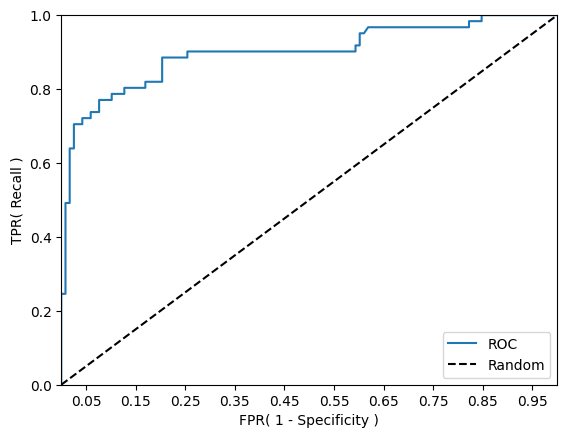

In [25]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )


* AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것. 1에 가까울수록 좋은 수치
* AUC 수치가 커지려면?  
: FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건

In [26]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))


ROC AUC 값: 0.8987


* get_clf_eval() 함수에 roc_auc_score() 를 이용해 ROC AUC값을 측정하는 로직을 추가하는데, ROC AUC는 예측 확률값을 기반으로 계산 --> 이를 get_clf_eval() 함수의 인자로 받을 수 있도록 get_clf_eval(y_test, pred=None, pred_proba=None) 로 함수형을 변경
* 이제 get_clf_eval() 함수는 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 값까지 출력할 수 있다.

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [28]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)


임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1: 0.7576, AUC:0.8987

임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1: 0.7869, AUC:0.8987

임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1: 0.7966, AUC:0.8987

임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1: 0.7965, AUC:0.8987

임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1: 0.8000, AUC:0.8987


# 06 피마 인디언 당뇨병 예측
* 피마 인디언 당뇨병 여부를 판단하는 머신러닝 예측 모델 수립 & 평가 지표들 적용
* [참고] https://velog.io/@fiifa92/%ED%94%BC%EB%A7%88-%EC%9D%B8%EB%94%94%EC%96%B8-%EB%8B%B9%EB%87%A8%EB%B3%91-%EC%98%88%EC%B8%A1-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%84%B8%ED%8A%B8%EB%A1%9C-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%ED%8F%89%EA%B0%80%ED%95%98%EA%B8%B0

* 피마 인디언 당뇨병 데이터
  * 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터
  * 피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔음
  * 하지만 20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자가 생겨남
  * 고립된 유전적 특성 때문에 당뇨학회에서는 피마 인디언의 당뇨병 자료에 대해 많은 연구를 함

* 피마 인디언 당뇨병 데이터 세트 구성
  * Pregnancies: 임신 횟수
  * Glucose: 포도당 부하 검사 수치
  * BloodPressure: 혈압(mm Hg)
  * SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
  * Insulin: 혈청 인슐린(mu U/ml)
  * BMI: 체질량지수(체중(kg)/(키(m))^2)
  * DiabetesPedigreeFunction: 당뇨 내력 가중치 값
  * Age: 나이
  * Outcome: 클래스 결정 값(0 또는 1)
  

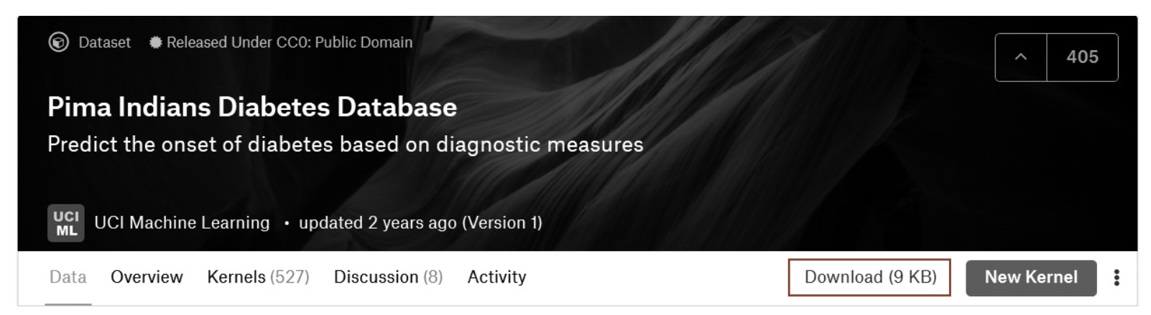

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from google.colab import drive
drive.mount('/content/drive')
file_path = ('/content/drive/MyDrive/data_머신러닝/diabetes.csv')

diabetes_data = pd.read_csv(file_path)
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Outcome
0    500
1    268
Name: count, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1

In [31]:
diabetes_data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* 평가지표 함수 생성

In [32]:
# 수정된 get_clf_eval() 함수
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [33]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

* 로지스틱 회귀를 이용해 예측 모델 생성

In [34]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출.
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행.
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926,    F1: 0.6465, AUC:0.8083


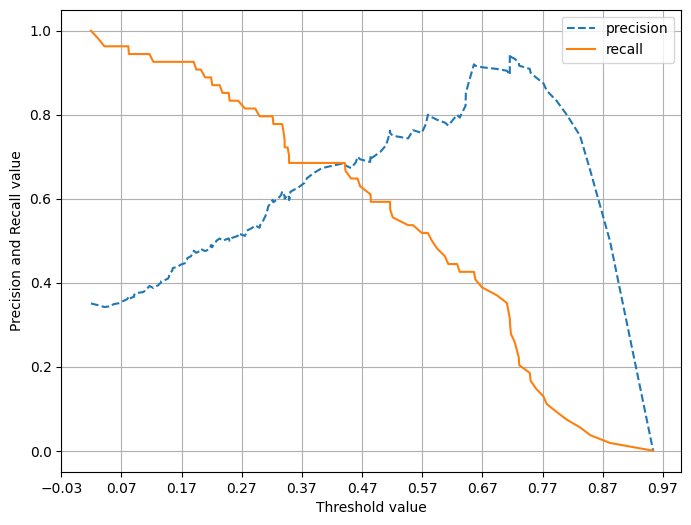

In [35]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

* 두 지표 값이 낮음
* 임곗값을 인위적으로 조작하기 전 데이터 다시 점검하기

In [36]:
diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

* Glucose 피처는 포도당 수치  
하지만 min 값이 0인 것은 잘못된 것.  
아래 히스토그램에 0 값이 일정 수준 존재하고 있음

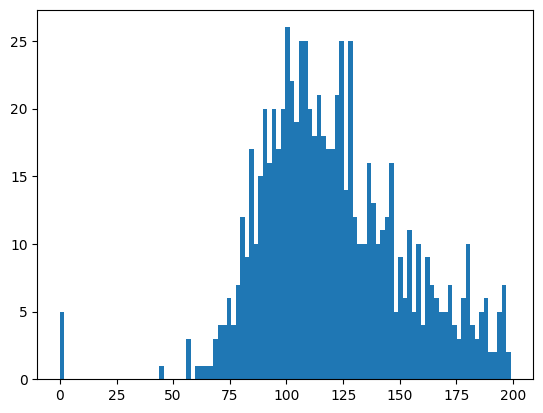

In [37]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

* min() 값이 0으로 돼 있는 피처에 대해 0값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인하기

In [38]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))


Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [39]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)

* 0값을 평균값으로 대체한 데이터 세트에 피처 스케일링을 적용해 변환하기

In [40]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8433


* 분류 결정 임곗값을 변화시키면서 재현율 값의 성능 수치가 어느 정도나 개선되는지 확인해보기

In [41]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [42]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963,    F1: 0.6615, AUC:0.8433
임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778,    F1: 0.6774, AUC:0.8433
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222,    F1: 0.6667, AUC:0.8433
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037,    F1: 0.6667, AUC:0.8433
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667,    F1: 0.6792, AUC:0.8433
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667,    F1: 0.6857, AUC:0.8433
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,    F1: 0.6931, AUC:0.8433
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8433


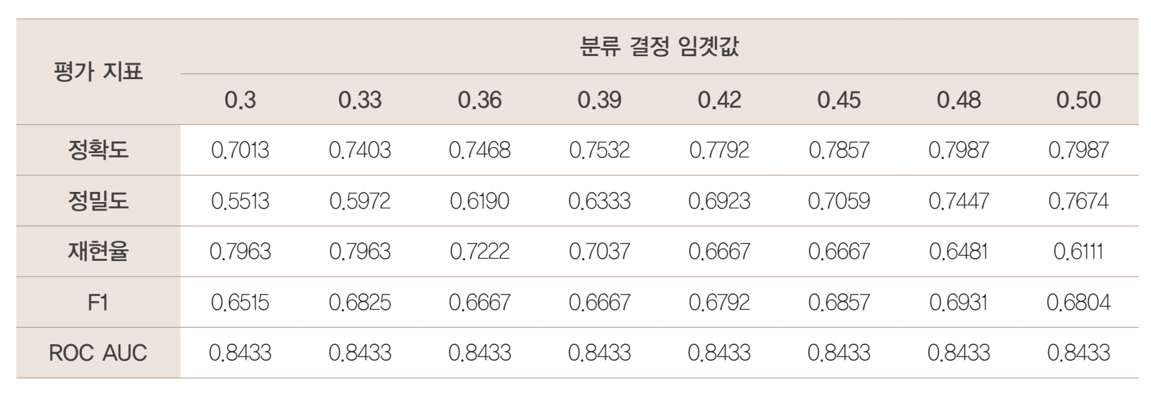

* 앞에서 학습된 로지스틱 회귀 모델을 이용해 임곗값을 0.48로 낮춘 상태에서 다시 예측해보기

In [43]:
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환.
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1))

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])




오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,    F1: 0.6931, AUC:0.8433
